Gunakan salah satu tipe pendekatan pada supervised learning
Gunakan minimal 2 algoritma untuk dibandingkan score terbaiknya
Tampilkan score dari model untuk clasifikasi dan tampilkan visualisasi model untuk regresi

K-Means **Clustering**

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [5]:
df2 = pd.read_csv("shades.csv")
df2

,brand,brand_short,product,product_short,hex,H,S,V,L,group
0,Maybelline,mb,Fit Me,fmf,f3cfb3,26.0,0.26,0.95,86,2
1,Maybelline,mb,Fit Me,fmf,ffe3c2,32.0,0.24,1.00,92,2
2,Maybelline,mb,Fit Me,fmf,ffe0cd,23.0,0.20,1.00,91,2
3,Maybelline,mb,Fit Me,fmf,ffd3be,19.0,0.25,1.00,88,2
4,Maybelline,mb,Fit Me,fmf,bd9584,18.0,0.30,0.74,65,2
...,...,...,...,...,...,...,...,...,...,...
620,L'Oréal,lo,True Match,tms,eecfba,24.0,0.22,0.93,85,7
621,L'Oréal,lo,True Match,tms,e8c7b8,19.0,0.21,0.91,83,7
622,L'Oréal,lo,True Match,tms,f0cbb9,20.0,0.23,0.94,85,7
623,L'Oréal,lo,True Match,tms,e9c4b1,20.0,0.24,0.91,82,7


In [6]:
df3 = pd.read_csv("wine.csv")
df3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5,MEDIUM
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,5,MEDIUM
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,5,MEDIUM
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,6,MEDIUM
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5,MEDIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10.7,0.35,0.53,2.6,0.070,5.0,16,0.9972,3.15,0.65,11.0,8,HIGH
496,7.8,0.52,0.25,1.9,0.081,14.0,38,0.9984,3.43,0.65,9.0,6,MEDIUM
497,7.2,0.34,0.32,2.5,0.090,43.0,113,0.9966,3.32,0.79,11.1,5,MEDIUM
498,10.7,0.35,0.53,2.6,0.070,5.0,16,0.9972,3.15,0.65,11.0,8,HIGH


DATA CLEANING

In [7]:
dataset_cl2 = df2.copy()
dataset_cl3 = df3.copy()

In [36]:
dataset_cl2.head()

,brand,brand_short,product,product_short,hex,H,S,V,L,group
0,Maybelline,mb,Fit Me,fmf,f3cfb3,26.0,0.26,0.95,86,2
1,Maybelline,mb,Fit Me,fmf,ffe3c2,32.0,0.24,1.00,92,2
2,Maybelline,mb,Fit Me,fmf,ffe0cd,23.0,0.20,1.00,91,2
3,Maybelline,mb,Fit Me,fmf,ffd3be,19.0,0.25,1.00,88,2
4,Maybelline,mb,Fit Me,fmf,bd9584,18.0,0.30,0.74,65,2


In [39]:
model = KMeans(n_clusters=4)

In [40]:
point = dataset_cl2[['S','L']]

In [41]:
model.fit(point)

KMeans(n_clusters=4)

In [42]:
label = model.labels_

In [43]:
label

array([0, 0, 0, 0, 2, 0, 0, 2, 2, 3, 0, 0, 0, 2, 2, 3, 2, 2, 3, 3, 1, 1,
       3, 1, 0, 0, 2, 2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 1, 0, 2, 2, 3, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 3, 2, 3, 3, 2, 1, 2, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 0,
       0, 0, 2, 2, 0, 2, 2, 2, 3, 3, 2, 3, 1, 0, 0, 0, 2, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 1, 1, 1, 1, 1, 0, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 3, 2, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 2,
       3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 3, 1, 3, 1, 1, 2, 3, 3,
       1, 3, 3, 3, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0,

In [44]:
X = point['S']
Y = point['L']

In [45]:
centroid = model.cluster_centers_
centroid

array([[ 0.31107527, 83.45698925],
       [ 0.63686275, 34.85294118],
       [ 0.43893519, 71.33333333],
       [ 0.5738843 , 55.48760331]])

Melihat centroid dari model yang sudah dibuat

In [46]:
centroid_X = centroid[:,0]
centroid_Y = centroid[:,1]

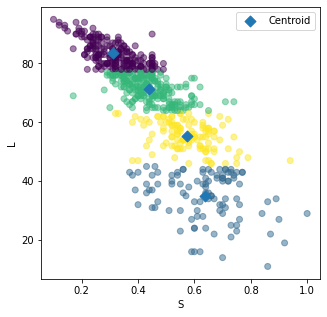

In [47]:
plt.figure(figsize=(5,5))
plt.scatter(X, Y, alpha=0.5, c=label)
plt.scatter(centroid_X, centroid_Y, marker='D', s=60, label='Centroid')
plt.xlabel('S')
plt.ylabel('L')
plt.legend()
plt.show()

Menentukan Jumlah Cluster (Elbow Method)

In [48]:
cluster_range = range(1,6)
inertias = []

for k in cluster_range:
    model = KMeans(n_clusters=k)
    model.fit(point)
    inertias.append(model.inertia_)

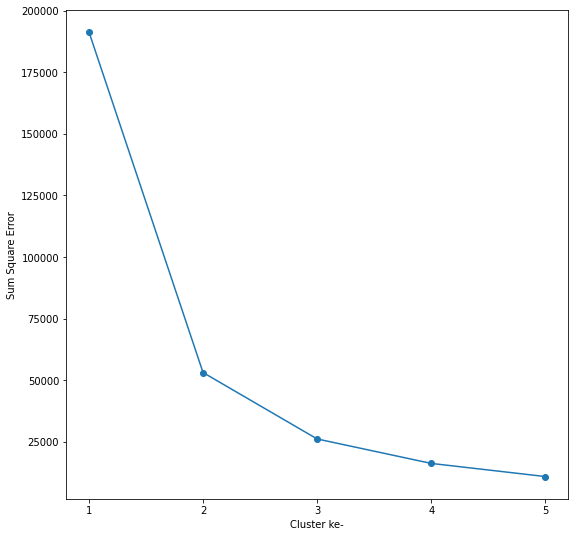

In [49]:
plt.figure(figsize=(9,9))
plt.plot(cluster_range, inertias, '-o')
plt.xlabel('Cluster ke-')
plt.ylabel('Sum Square Error')
plt.xticks(cluster_range)
plt.show()